# Capstone Project - The Battle of Neighbourhoods

## Introduction/Business Problem

Ollie's Ice Cream + Stuff is a dog-friendly ice cream parlour based in Bushwick, New York City. They are the first-ever ice cream parlour in NYC making flavours dogs can actually eat.

With business booming, the owners of Ollie's Ice Cream + Stuff are wondering if they should open a franchise outlet in Toronto.

This report aims to find out: 
Should Ollie's Ice Cream + Stuff open a franchise outlet in Toronto? Which neighbourhood in Toronto is best suited for their store?

## Data

##### First, we need to find out if Ollie's Ice Cream + Stuff is likely to be as successful in Toronto as it is in New York City. 

We can do this by answering the following questions:

1. Does Toronto have an ice cream culture? 
2. Are there as many pet dogs in Toronto as there are in New York City?

Using Foursquare location data, we can determine and compare the number of ice cream parlours in each city. 

Using the NYC Dog Licensing Dataset and the Toronto Dog Licence Database, we can determine and compare the number of pet dogs in each city. 

##### Next, we need to find out which neighbourhood in Toronto is most similar to Bushwick.

We can do this by answering the following questions:

1. What amenities are available in Bushwick?
2. Which neighbourhood in Toronto has similar amenities?

Using Foursquare location data, we can determine and compare the amenities available in Bushwick and the different neighbourhoods in Toronto.

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plot

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

# import BeautifulSoup
from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

### NYC and Toronto's boroughs and neighbourhoods

In [13]:
# NYC data
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [14]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [15]:
nyc_neighborhoods_data = newyork_data['features']

In [16]:
nyc_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [17]:
# Define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# Instantiate the dataframe
nyc_neighborhoods = pd.DataFrame(columns=column_names)

In [18]:
for data in nyc_neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyc_neighborhoods = nyc_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [19]:
nyc_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [20]:
# Toronto data
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
req = requests.get(url)
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
toronto_neighborhoods_data = pd.DataFrame(df[0])

In [21]:
toronto_neighborhoods_data['Neighborhood'] = toronto_neighborhoods_data['Neighborhood'].replace('Not assigned', toronto_neighborhoods_data['Borough'])
toronto_neighborhoods_data['Borough'] = toronto_neighborhoods_data['Borough'].replace('Not assigned', np.nan)
toronto_neighborhoods = toronto_neighborhoods_data.dropna()
toronto_neighborhoods.reset_index(drop = True)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [22]:
geo_df = pd.read_csv('http://cocl.us/Geospatial_data')

In [23]:
ll_df = toronto_neighborhoods.merge(geo_df)
ll_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [24]:
df_toronto = ll_df[ll_df['Borough'].astype(str).str.contains('Toronto')]
df_toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


### Comparing the number of ice cream parlours in NYC and Toronto

In [4]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'FCXLZILYAD2E4M235P5K3XBPAQTXTNOSLFYGDRM1FOVUPY3L' # your Foursquare ID
CLIENT_SECRET = '4VS2GITDPFVO43HLQ1C4VJJWDB4RNJAOZ2HQY4FNSRQMAOXS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FCXLZILYAD2E4M235P5K3XBPAQTXTNOSLFYGDRM1FOVUPY3L
CLIENT_SECRET:4VS2GITDPFVO43HLQ1C4VJJWDB4RNJAOZ2HQY4FNSRQMAOXS


In [36]:
# Number of ice cream parlours in NYC
icecream_id = '4bf58dd8d48988d1c9941735'
nyc_lat = 40.730610
nyc_long = -73.935242

# create URL
nyc_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    nyc_lat, 
    nyc_long,  
    icecream_id)
nyc_url # display URL
nyc_results = requests.get(nyc_url).json()
nyc_results

{'meta': {'code': 200, 'requestId': '5ef46d2fffc68c02666077ab'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'suggestedRadius': 1683,
  'headerLocation': 'Northwestern Queens',
  'headerFullLocation': 'Northwestern Queens, Queens',
  'headerLocationGranularity': 'neighborhood',
  'query': 'ice cream',
  'totalResults': 74,
  'suggestedBounds': {'ne': {'lat': 40.768589346455684,
    'lng': -73.90297063562215},
   'sw': {'lat': 40.70198772443068, 'lng': -73.98495454116085}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b894ff4f964a520ad2a32e3',
       'name': 'Van Leeuwen Artisan Ice Cream',
       'location': {'address': '620 Manhattan Ave',
        'cro

In [37]:
nyc_icecream = nyc_results['response']['totalResults']
    
print('{} venues were returned by Foursquare.'.format(nyc_icecream))

74 venues were returned by Foursquare.


In [38]:
# Number of ice cream parlours in Toronto
toronto_lat = 43.651070
toronto_long = -79.347015

# create URL
toronto_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    toronto_lat, 
    toronto_long,  
    icecream_id)
toronto_url # display URL
toronto_results = requests.get(toronto_url).json()
toronto_results

{'meta': {'code': 200, 'requestId': '5ef46c4e04a5484389476225'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'suggestedRadius': 1574,
  'headerLocation': 'Downtown Toronto',
  'headerFullLocation': 'Downtown Toronto, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'query': 'ice cream',
  'totalResults': 67,
  'suggestedBounds': {'ne': {'lat': 43.67986182258651,
    'lng': -79.30896561856099},
   'sw': {'lat': 43.64570174928854, 'lng': -79.39400401021913}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad7e958f964a520001021e3',
       'name': "Ed's Real Scoop",
       'location': {'address': '920 Queen St. E',
        'crossStreet': 'btwn Logan Ave. & Morse St.',
        'lat': 43.66

In [39]:
toronto_icecream = toronto_results['response']['totalResults']
    
print('{} venues were returned by Foursquare.'.format(toronto_icecream))

67 venues were returned by Foursquare.


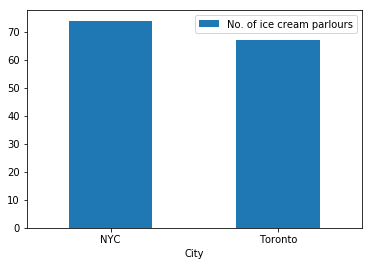

In [40]:
# Visualisation of number of ice cream parlours
icecream = pd.DataFrame({'City':['NYC', 'Toronto'], 'No. of ice cream parlours':[nyc_icecream, toronto_icecream]})
ax1 = icecream.plot.bar(x='City', y='No. of ice cream parlours', rot=0)

### Comparing the number of pet dogs in NYC and Toronto

In [111]:
# Load the NYC Dog Licensing Dataset
url = "https://data.cityofnewyork.us/resource/nu7n-tubp.csv"
nyc_dogs = pd.read_csv(url)
nyc_dogs.head()

,rownumber,animalname,animalgender,animalbirth,breedname,borough,zipcode,licenseissueddate,licenseexpireddate,extract_year
0,1,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,NaN,10035,2014-09-12T00:00:00.000,2017-09-12T00:00:00.000,2016
1,2,YOGI,M,2010,Boxer,NaN,10465,2014-09-12T00:00:00.000,2017-10-02T00:00:00.000,2016
2,3,ALI,M,2014,Basenji,NaN,10013,2014-09-12T00:00:00.000,2019-09-12T00:00:00.000,2016
3,4,QUEEN,F,2013,Akita Crossbreed,NaN,10013,2014-09-12T00:00:00.000,2017-09-12T00:00:00.000,2016
4,5,LOLA,F,2009,Maltese,NaN,10028,2014-09-12T00:00:00.000,2017-10-09T00:00:00.000,2016


In [112]:
# Load the Toronto Dog Licensing Dataset
url = "http://globalnewsstatic.s3.amazonaws.com/content/interactives/opendata/111116_TO_dogs.csv"
toronto_dogs = pd.read_csv(url)
toronto_dogs.head()

,Postal Code Prefix,Breed of Dog,Animal Name
0,M1P,TOY POODLE,123
1,M9A,SCHNAUZER STAND / POODLE MIN,210
2,M6M,GERM SHEPHERD,Mar-00
3,M1C,LABRADOR RETR,BLAZE
4,M1W,BEARDED COLLIE,BOUNCER


In [113]:
# Number of pet dogs in NYC and Toronto
nyc_ndogs = len(nyc_dogs)
toronto_ndogs = len(toronto_dogs)
print('No. of pet dogs in NYC:', nyc_ndogs, '\n', 'No. of pet dogs in Toronto:', toronto_ndogs)

No. of pet dogs in NYC: 1000 
 No. of pet dogs in Toronto: 71984


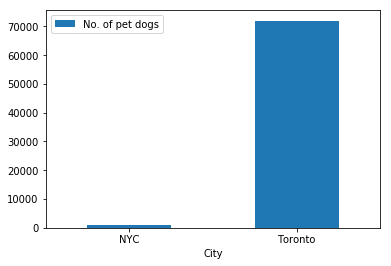

In [114]:
# Visualisation of number of pet dogs
dogs = pd.DataFrame({'City':['NYC', 'Toronto'], 'No. of pet dogs':[nyc_ndogs, toronto_ndogs]})
ax = dogs.plot.bar(x='City', y='No. of pet dogs', rot=0)

### Comparing the amenities in Bushwick with each neighbourhood in Toronto

In [42]:
# Amenities in Bushwick
bw_lat = 40.685111
bw_long = -73.910213

# create URL
bw_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    bw_lat, 
    bw_long)
bw_url # display URL
bw_results = requests.get(bw_url).json()
bw_results

{'meta': {'code': 200, 'requestId': '5ef46bb06e5c0a4648698235'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'suggestedRadius': 1631,
  'headerLocation': 'Bushwick',
  'headerFullLocation': 'Bushwick, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 141,
  'suggestedBounds': {'ne': {'lat': 40.69727105590415,
    'lng': -73.899952289169},
   'sw': {'lat': 40.67426402520573, 'lng': -73.92754187760369}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '563fe694498e1a75e28fdaf3',
       'name': 'Salud Bar & Grill',
       'location': {'address': '1413 Bushwick Ave',
        'crossStreet': 'Moffat',
        'lat': 40.68451327279921,
   

In [44]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [56]:
# Types of establishments in Bushwick
bw_venues = bw_results['response']['groups'][0]['items']
    
bw_nearby_venues = json_normalize(bw_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
bw_nearby_venues = bw_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
bw_nearby_venues['venue.categories'] = bw_nearby_venues.apply(get_category_type, axis=1)

# clean columns
bw_nearby_venues.columns = [col.split(".")[-1] for col in bw_nearby_venues.columns]

bw_categories = bw_nearby_venues[['categories']]
bw_categories.reset_index(drop = True)

,categories
0,Restaurant
1,Athletics & Sports
2,Indian Restaurant
3,Pizza Place
4,Café
5,Park
6,Chinese Restaurant
7,Bar
8,Park
9,Ice Cream Shop


In [83]:
# Identify the neighbourhoods in Toronto
ntoronto_df = pd.DataFrame(df_toronto[['Postal Code','Neighborhood', 'Latitude', 'Longitude']])
ntoronto_df.reset_index(drop = True)

,Postal Code,Neighborhood,Latitude,Longitude
0,M5A,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,St. James Town,43.651494,-79.375418
4,M4E,The Beaches,43.676357,-79.293031
5,M5E,Berczy Park,43.644771,-79.373306
6,M5G,Central Bay Street,43.657952,-79.387383
7,M6G,Christie,43.669542,-79.422564
8,M5H,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [108]:
# Visualisation of neighbourhoods in Toronto
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [157]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(ntoronto_df['Latitude'], ntoronto_df['Longitude'], ntoronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [86]:
# Create a function to obtain the categories of venues in a neighbourhood
def getNeighborhoodCategories(lat, long):

    CLIENT_ID = 'FCXLZILYAD2E4M235P5K3XBPAQTXTNOSLFYGDRM1FOVUPY3L' # your Foursquare ID
    CLIENT_SECRET = '4VS2GITDPFVO43HLQ1C4VJJWDB4RNJAOZ2HQY4FNSRQMAOXS' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version    
    
    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        long)
    
    results = requests.get(url).json()
    
    venues = results['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    df_categories = nearby_venues[['categories']]
    df_categories.reset_index(drop = True)
    
    return df_categories

In [87]:
# Finding the top 5 neighbourhoods in Toronto with similar establishments as Bushwick
matches = {}

for index, row in ntoronto_df.iterrows():
    lat = row['Latitude']
    long = row['Longitude']
    df_compare = getNeighborhoodCategories(lat, long)
    df_new = df_compare.merge(bw_categories)
    num = len(df_new)
    nbh = row['Neighborhood']
    matches[nbh] = num

matches

{'Regent Park, Harbourfront': 27,
 "Queen's Park, Ontario Provincial Government": 20,
 'Garden District, Ryerson': 10,
 'St. James Town': 13,
 'The Beaches': 11,
 'Berczy Park': 10,
 'Central Bay Street': 19,
 'Christie': 16,
 'Richmond, Adelaide, King': 19,
 'Dufferin, Dovercourt Village': 33,
 'Harbourfront East, Union Station, Toronto Islands': 11,
 'Little Portugal, Trinity': 13,
 'The Danforth West, Riverdale': 18,
 'Toronto Dominion Centre, Design Exchange': 26,
 'Brockton, Parkdale Village, Exhibition Place': 18,
 'India Bazaar, The Beaches West': 26,
 'Commerce Court, Victoria Hotel': 19,
 'Studio District': 18,
 'Lawrence Park': 21,
 'Roselawn': 25,
 'Davisville North': 21,
 'Forest Hill North & West, Forest Hill Road Park': 23,
 'High Park, The Junction South': 24,
 'North Toronto West, Lawrence Park': 23,
 'The Annex, North Midtown, Yorkville': 14,
 'Parkdale, Roncesvalles': 21,
 'Davisville': 24,
 'University of Toronto, Harbord': 14,
 'Runnymede, Swansea': 26,
 'Moore Park

In [164]:
# Convert dictionary of matches into a df
matches_df = pd.DataFrame(matches, index=['Matches'])
Tmatches_df = matches_df.transpose()
Tmatches_df.sort_values(['Matches'], axis = 0, ascending = False, inplace = True)
Tmatches_df.head()

,Matches
"Dufferin, Dovercourt Village",33
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",28
"Regent Park, Harbourfront",27
"Toronto Dominion Centre, Design Exchange",26
"Runnymede, Swansea",26


In [169]:
nbh = ['Dufferin, Dovercourt Village', 'Business reply mail Processing Centre, South Central Letter Processing Plant Toronto', 
       'Regent Park, Harbourfront', 'Toronto Dominion Centre, Design Exchange', 'Runnymede, Swansea']

top5 = ntoronto_df[ntoronto_df['Neighborhood'].isin(nbh)] 
top5

,Postal Code,Neighborhood,Latitude,Longitude
2,M5A,"Regent Park, Harbourfront",43.654260,-79.360636
31,M6H,"Dufferin, Dovercourt Village",43.669005,-79.442259
42,M5K,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576
81,M6S,"Runnymede, Swansea",43.651571,-79.484450
100,M7Y,"Business reply mail Processing Centre, South C...",43.662744,-79.321558


In [176]:
# Visualisation of top 5 neighbourhoods
map_top5 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(top5['Latitude'], top5['Longitude'], top5['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_top5)  
    
map_top5